# Discover Long Short-Term Memory (LSTM) networks in Python 
You would like to model stock prices correctly, so as a stock buyer you can reasonably decide when to buy stocks and when to sell them to make a profit. This is where time series modelling comes in. You need good machine learning models that can look at the history of a sequence of data and correctly predict what the future elements of the sequence are going to be.

### References
https://kth.diva-portal.org/smash/get/diva2:1214307/FULLTEXT01.pdf

## Step1: Import check library
Warning occur from numpy lib (fixed by pip install upgrade numpy)

In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import datetime as dt
import os
import numpy as np 
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional 
import math
from matplotlib.dates import DateFormatter

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Step2: Import data 
Import `AAPL` Data from 01/01/2008-30/09/2018 and then check stat

In [2]:
#custom_dateparser = lambda x: pd.datetime.strptime(x, "%Y/%m/%d")
df = pd.read_csv(r'D:\Project files\FXProjects\AAPL Historical Data.csv', index_col='Date', parse_dates=True)

In [3]:
df.head()

,Close,Open,High,Low,Vol.
Date,,,,,
2008-01-02,27.83,28.47,28.61,27.51,269.79M
2008-01-03,27.85,27.92,28.20,27.53,210.52M
2008-01-04,25.72,27.35,27.57,25.56,363.96M
2008-01-07,25.38,25.89,26.23,24.32,518.05M
2008-01-08,24.46,25.73,26.07,24.40,380.95M


Text(0,0.5,'Mid Price')

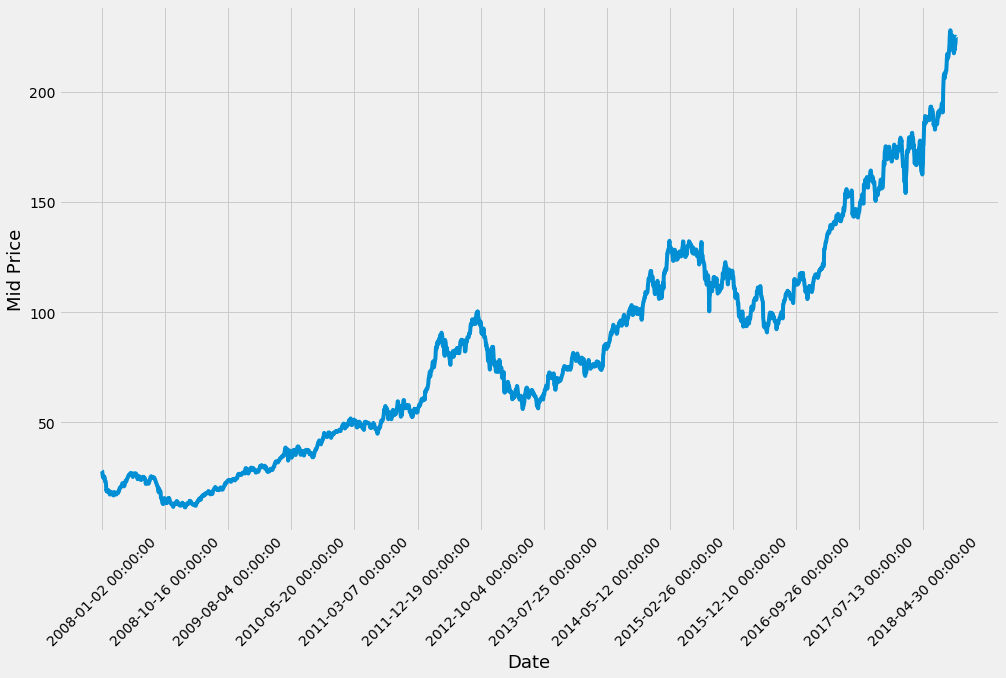

In [33]:
#formatter = DateFormatter('%Y/%m/%d')
plt.figure(figsize = (15,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],200),df.index[::200],rotation=45)
#plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)

In [4]:
df.describe() #Check basic statistic

,Close,Open,High,Low
count,2707.000000,2707.000000,2707.000000,2707.000000
mean,82.543668,82.542375,83.278146,81.770635
std,49.861318,49.829060,50.181595,49.519002
min,11.170000,11.340000,11.710000,11.170000
25%,38.645000,38.685000,39.010000,38.305000
50%,76.970000,77.110000,77.990000,76.340000
75%,113.705000,113.680000,114.645000,112.500000
max,228.360000,228.990000,229.670000,226.630000


## Step3: Splitting Data into a Training set and a Test set which Normalizing the data
You will use the mid price calculated by taking the average of the highest and lowest recorded prices on a day.
* Covert Pandas serie to numpy array use `Pandas.Dataframe.values` 

In [5]:
# Calculate the mid prices from the highest and lowest
mid_price = (df['High'].values+df['Low'].values)/2

In [6]:
mid_price[:20]

array([28.06 , 27.865, 26.565, 25.275, 25.235, 24.84 , 25.46 , 24.85 ,
       25.325, 24.56 , 23.265, 23.125, 23.24 , 21.855, 19.01 , 19.48 ,
       19.195, 18.545, 18.705, 18.96 ])

In [7]:
training_set = df[:'2016'].iloc[:,1:2].values
test_set = df['2017':].iloc[:,1:2].values

In [8]:
x_train, x_test, y_train, y_test = train_test_split(mid_price, mid_price, test_size=0.3)

In [9]:
scaler = MinMaxScaler(feature_range=(0,1)) # Set scale range (0-1)
train_data = x_train.reshape(-1,1) # Convert to column data <Pick data size and column>
test_data = x_test.reshape(-1, 1)

### Custom data point split train and test set
This set traning data set by using data from 2008 -> 2015 and then test by data from 2015 -> 2018

In [40]:
# Rolling windwos with 1 time step example 
history = [x for x in train_data]
pridictions = list()
for i in range(len(test)):
    #make prediction....

SyntaxError: unexpected EOF while parsing (<ipython-input-40-5ae0c3ad58bd>, line 5)

Text(0.5,1,'AAPL close price')

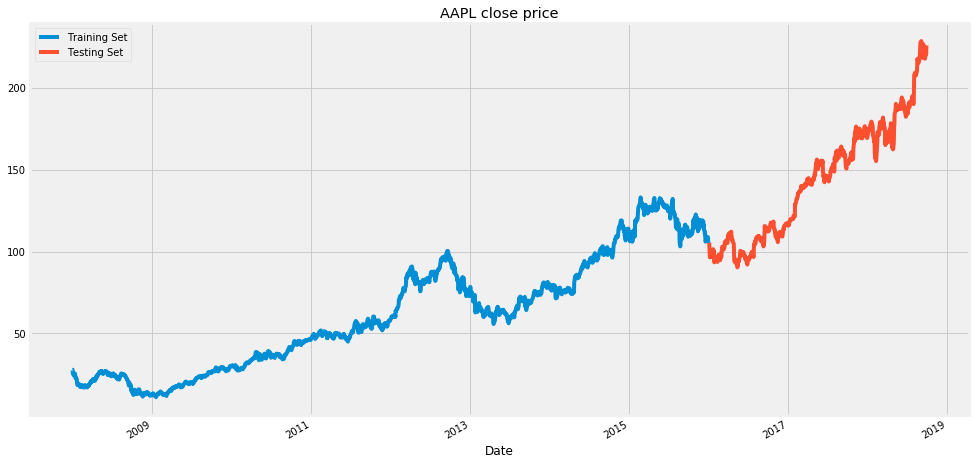

In [10]:
# Custom split by data point
train_set = df['Close'][df.index.year<=2015].values
test_set = df['Close'][df.index.year>2015].values

# Vistualize the data afer train and test split
df['Close'][df.index.year<=2015].plot(figsize=(15,8), legend=True)
df['Close'][df.index.year>2015].plot(figsize=(15,8), legend=True)
plt.legend(['Training Set', 'Testing Set'])
plt.title('AAPL close price')

### Set Scaling the training set 
* scaling `MinMaxScaler` with range (0-1)
* Since LSTM store long term memory state, we create a data structure with 60 timesteps and 1 output, that mean each elements of training set, we have 60 previous training set elements

In [11]:
train_set = train_set.reshape(-1,1)

sc = MinMaxScaler(feature_range=(0,1))
train_set_scaled = sc.fit_transform(train_set)

In [12]:
# Rolling windows 
x_train = []
y_train = []
for i in range(60, len(train_set_scaled)):
    x_train.append(train_set_scaled[i-60:i,0])
    y_train.append(train_set_scaled[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

## Step4: Implement Model 
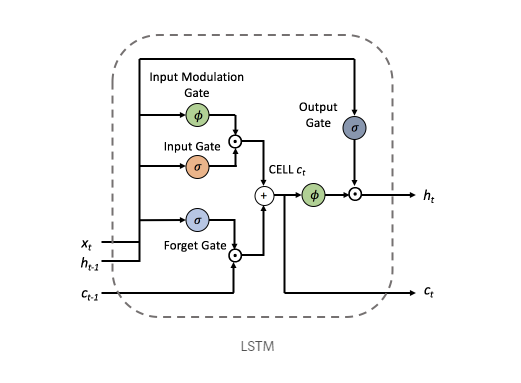

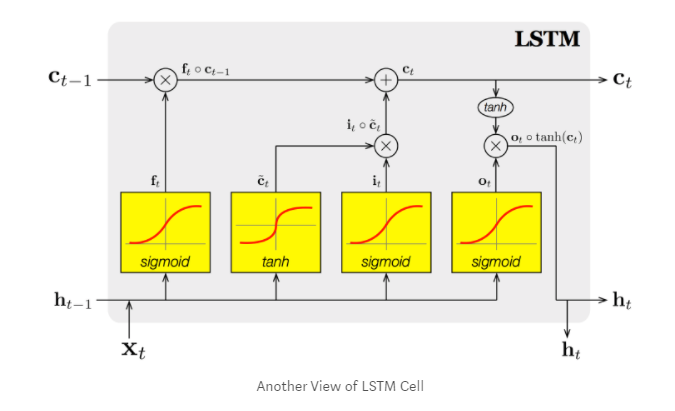

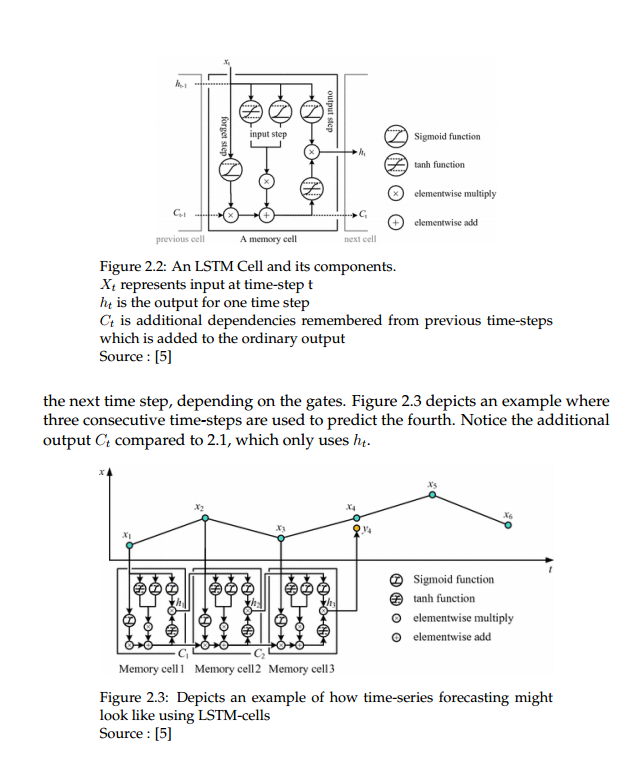
### Forget Gate 
$ ft=\sigma $

In [14]:
# The LSTM architecture
regressor = Sequential()

# 1) LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

# 2) LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# 3) LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# 4) LSTM Layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# The Output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set 
regressor.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)

Now to get the tets set ready in a similar way as the training set
The following has been done so forst 60 entires of test set have 60 previous values witch is impossible to get unless we take the whole `Close` attribute data for processing 

In [49]:
dataset_total = pd.concat((df['Close'][:'2016'], df['Close']['2017']))
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [51]:
# Preparing X_test and predicting the prices 
X_test = []
for i in range(60, 311):
    X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [55]:
# Defind help function
def plot_predictons(test, predicted, label):
    plt.plot(test, color='red',label='Real %s Stock Price'%label)
    plt.plot(predicted, color='blue',label='Predicted %s Stock Price'%label)
    plt.title('%s Stock Price Prediction(LSTM)'%label)
    plt.xlabel('Time')
    plt.ylabel('%s Stock Price'%label)
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    

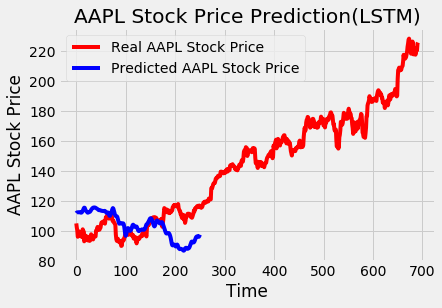

In [58]:
# Visualizing the results for LSTM
plot_predictons(test_set, predicted_stock_price, "AAPL")

In [59]:
# Evaluating model
return_rmse(test_set, predicted_stock_price)

ValueError: Found input variables with inconsistent numbers of samples: [692, 251]